In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

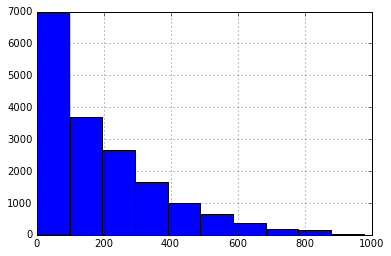

In [3]:
bike_rentals['cnt'].hist()

In [4]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [5]:
def assign_label(hr):
    if hr >= 6 and hr < 12:
        return 1
    elif hr >= 12 and hr < 18:
        return 2
    elif hr >= 18 and hr < 24:
        return 3
    elif hr >= 0 and hr < 6:
        return 4

In [6]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [7]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [9]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [10]:
print(bike_rentals.shape[0])
print(train.shape[0])
print(test.shape[0])

17379
13903
3476


In [11]:
features = ['instant', 'hr', 'temp', 'hum', 'time_label', 'season', 'yr']
target = 'cnt'

lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = mse ** (1/2)

print(mse, rmse)

17977.038273348182 134.07847803934897


In [25]:
dt = DecisionTreeRegressor(min_samples_leaf=10)
dt.fit(train[features], train[target])
predictions = dt.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = mse ** (1/2)

print(mse, rmse)

8493.07918826199 92.15790355830579


In [43]:
rf = RandomForestRegressor(min_samples_split=5)
rf.fit(train[features], train[target])
predictions = rf.predict(test[features])
mse = mean_squared_error(test[target], predictions)
rmse = mse ** (1/2)

print(mse, rmse)

7316.961230474907 85.53923795823124
